# Modelos de regresión multi-outputs

La regresión de múltiples salidas son problemas de regresión que involucran la predicción de dos o más valores numéricos dado un ejemplo de entrada.
Muchos algoritmos de aprendizaje automático están diseñados para predecir un único valor numérico, denominado simplemente regresión. Algunos algoritmos admiten la regresión de múltiples salidas de forma inherente, como la regresión lineal y los árboles de decisión. También hay modelos alternativos especiales que se pueden usar para ajustar y usar esos algoritmos que no admiten de forma nativa la predicción de múltiples salidas.

## Metodo regresión lineal

In [1]:
#Cargamos las librerias necesarias para hacer una regresion lineal 
from sklearn.linear_model import LinearRegression
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MaxAbsScaler

In [2]:
plt.rcParams['figure.figsize'] = [14,7]
plt.rcParams['font.size'] = 14

In [3]:
#Cargamos el dataset para el training
dataset = np.loadtxt("planta_training_SIN.csv",delimiter=",")
'''
Calculamos las dimenciones del data set para generar los vetores U (steps) y el vector t
'''
m = np.shape(dataset)[0]
n = np.shape(dataset)[1]

u = np.array([i*0.1 for i in range(m)])
t = np.linspace(0,10,n)

In [4]:
#Definimos las entradas en la variable X y las salidas en la variable Y
X = np.meshgrid(u,t)[0].T
Y = dataset

In [5]:
scale_x =  MaxAbsScaler()
X = scale_x.fit_transform(X)
scale_y =  MaxAbsScaler()
Y = scale_y.fit_transform(Y)
print(X.min(), X.max(), Y.min(), Y.max())

0.0 1.0 -1.0 1.0


### Verificamos que nuestros datos no se hayan distorcionado

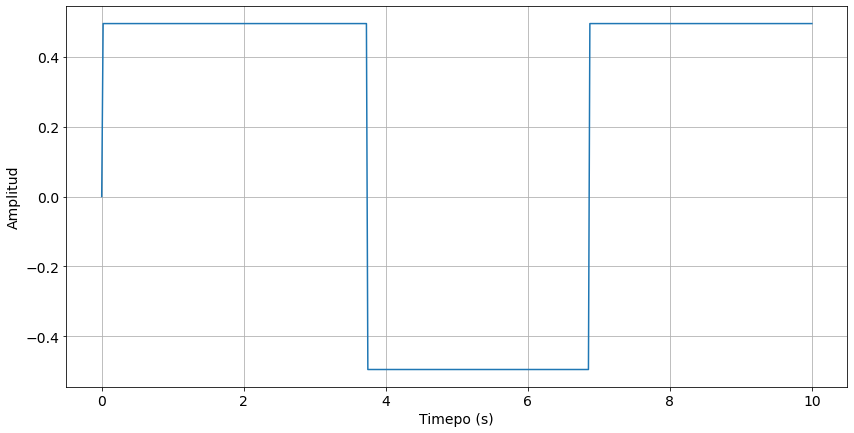

In [21]:

y_norm =  Y[49][:]


plt.plot(t,y_norm )

plt.xlabel('Timepo (s)')
plt.ylabel('Amplitud')
plt.grid()

In [7]:
    # Definimos el modelo que vamos a utilizar
model = LinearRegression()
# mandamos a entrenar el modelo
model.fit(X, Y)
# hacemos una prediccion

U = 27.5*np.sin(t)
row = U 
y_pr = model.predict([row])
y_p = scale_y.inverse_transform(y_pr).T

Hacemos una comparación  de los datos con la predicción y los datos del dataset de validacion

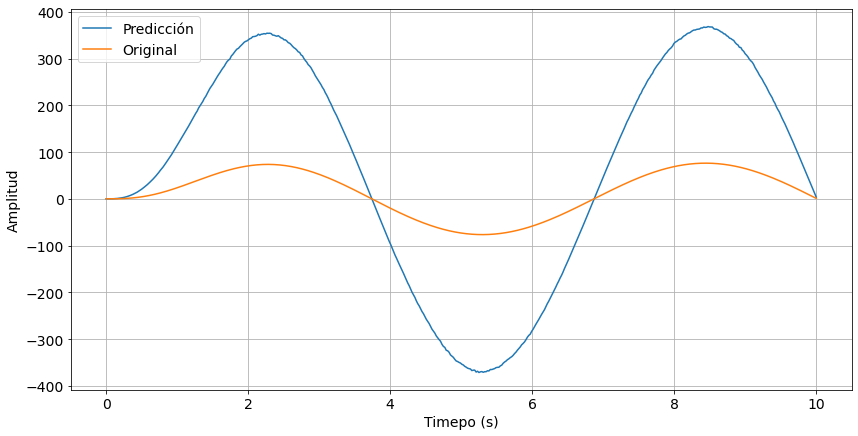

In [23]:
#Cargamos el dataset de validación
dataset_v = np.loadtxt("planta_validation_SIN.csv",delimiter=",")
'''
u = np.array([26*np.sin(t),27.5*np.sin(t),40*np.sin(t)])
'''
y_v = dataset_v[1][:]

plt.plot(t,y_p,label='Predicción')
plt.plot(t,y_v,label='Original')

plt.xlabel('Timepo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

## k-Nearest Neighbors para regrecion multi-output

In [9]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
#Entrenamos el modelo
model.fit(X, Y)
# hacemos una prediccion
U = 27.5*np.sin(t)
row = U 


y_pr2 = model.predict([row])
y_p2 = scale_y.inverse_transform(y_pr2).T

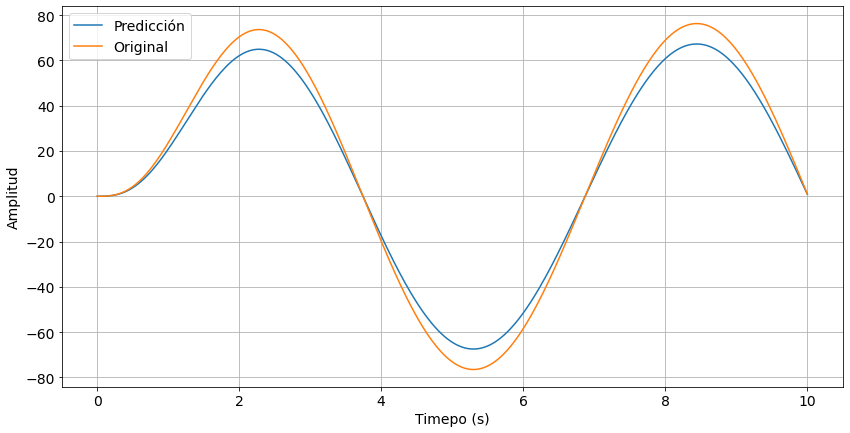

In [10]:
'''
u = np.array([26*np.sin(t),27.5*np.sin(t),40*np.sin(t)])
'''
y_v = dataset_v[1][:]

plt.plot(t,y_p2,label='Predicción')
plt.plot(t,y_v,label='Original')

plt.xlabel('Timepo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

## Decision Tree para regrecion multi-output

In [11]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
#Entrenamos el modelo
model.fit(X, Y)
# hacemos una prediccion
U = 27.5*np.sin(t)
row = U 

y_pr3 = model.predict([row])
y_p3 = scale_y.inverse_transform(y_pr3).T

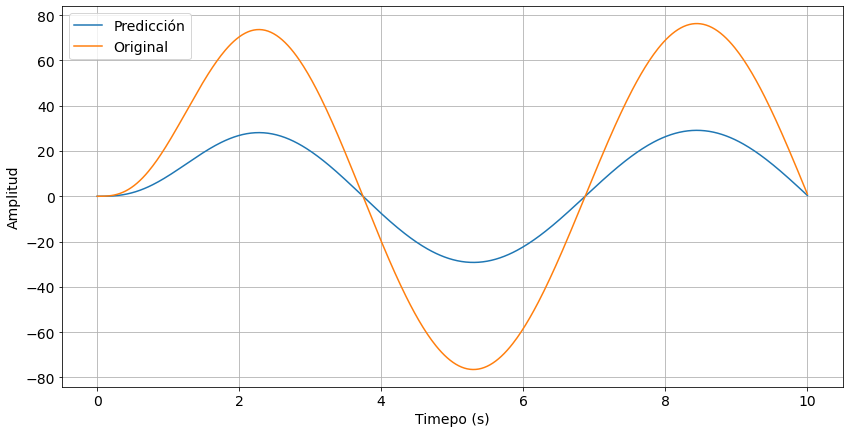

In [12]:
'''
u = np.array([26*np.sin(t),27.5*np.sin(t),40*np.sin(t)])
'''
y_v = dataset_v[1][:]

plt.plot(t,y_p3,label='Predicción')
plt.plot(t,y_v,label='Original')

plt.xlabel('Timepo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

## Red neuronal multi-output

In [13]:
#Importamos las librerias para redes neuronales
from numpy import asarray
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RepeatedKFold

In [14]:
#Creamos nuestra red neuronal
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(1000, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(990, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(980, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(970, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(960, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(300, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
    model.compile(loss='mae', optimizer='Adam')
    return model

In [15]:
n_inputs, n_outputs = X.shape[1], Y.shape[1] 
# get mandamos a llamar a nuestro modelo
model = get_model(n_inputs, n_outputs)
# entrenamos a las red nuronal
model.fit(X, Y, verbose=0, epochs=2000,batch_size=99)

In [16]:
# make a prediction for new data
U = 27.5*np.sin(t)
row = U 
newX = asarray([row])
y_pr4= model.predict(newX)

y_p4 = scale_y.inverse_transform(y_pr4).T

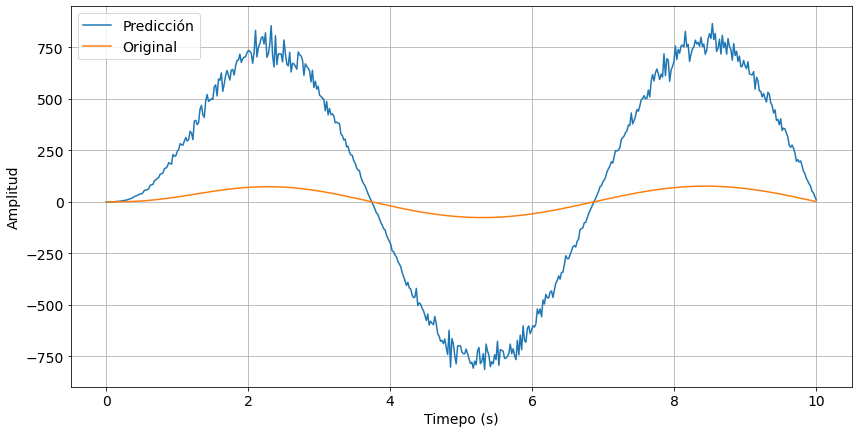

In [17]:
'''
u = np.array([26*np.sin(t),27.5*np.sin(t),40*np.sin(t)])
'''
y_v = dataset_v[1][:]

plt.plot(t,y_p4,label='Predicción')
plt.plot(t,y_v,label='Original')

plt.xlabel('Timepo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

In [18]:
print('Metodo regresión lineal')
print('MSE: %.4f' % mean_squared_error(y_v, y_p))
print('k-Nearest Neighbors para regrecion multi-output')
print('MSE: %.4f' % mean_squared_error(y_v, y_p2))
print('Decision Tree para regrecion multi-output')
print('MSE: %.4f' % mean_squared_error(y_v, y_p3))
print('Red neuronal multi-output')
print('MSE: %.4f' % mean_squared_error(y_v, y_p4))

Metodo regresión lineal
MSE: 38269.8475
k-Nearest Neighbors para regrecion multi-output
MSE: 36.8897
Decision Tree para regrecion multi-output
MSE: 1009.3365
Red neuronal multi-output
MSE: 224454.3261


FUENTE: https://machinelearningmastery.com/multi-output-regression-models-with-python/